In [44]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt


In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [53]:
PATH = 'PokemonData'
PATH1 = 'test_Set'
classes = os.listdir(PATH)
class1 = os.listdir(PATH1)

# image preprocessing

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True )

training_Set = train_datagen.flow_from_directory(PATH,target_size=(64,64),batch_size=32,class_mode = 'categorical') 

Found 6820 images belonging to 150 classes.


In [101]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_Set = test_datagen.flow_from_directory(
        'test_Set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 8 images belonging to 4 classes.


image augmentation has been applied

sampling images from the training set

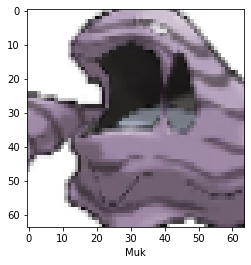

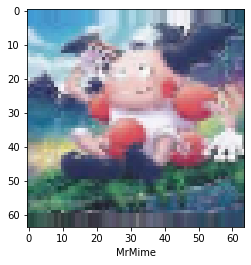

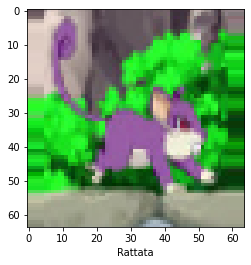

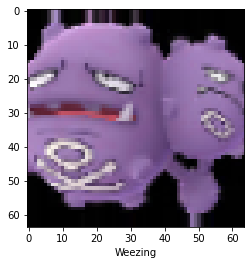

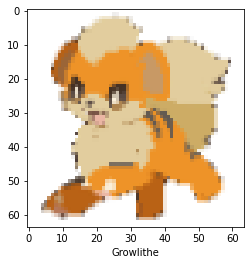

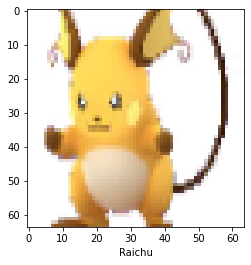

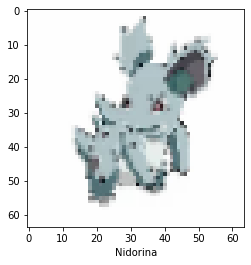

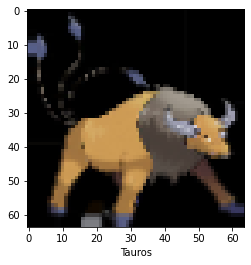

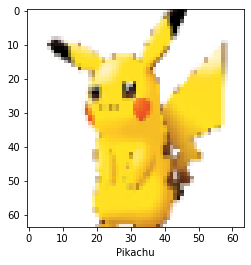

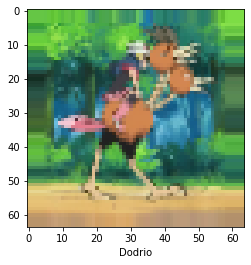

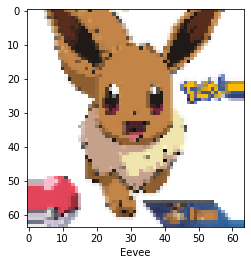

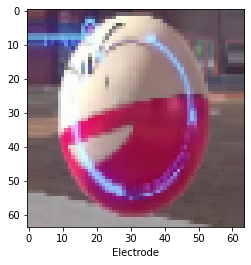

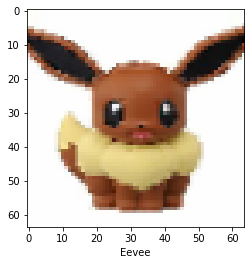

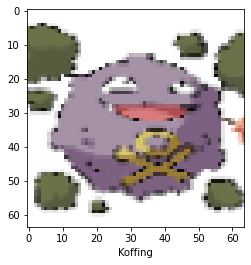

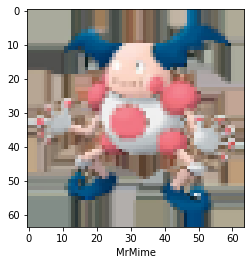

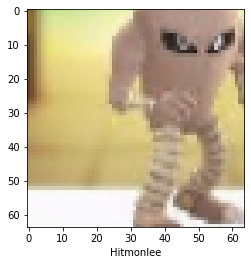

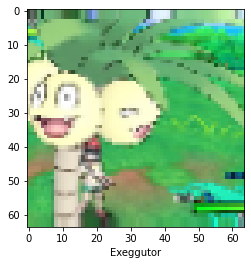

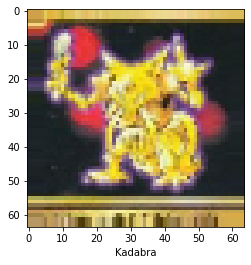

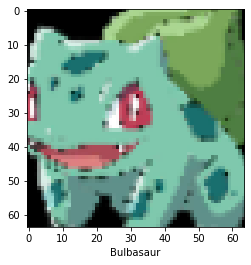

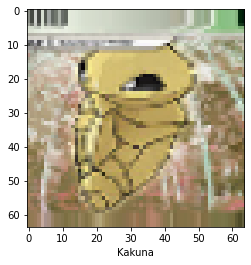

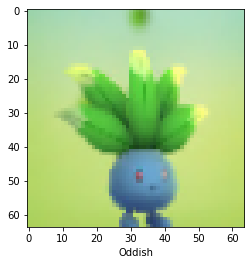

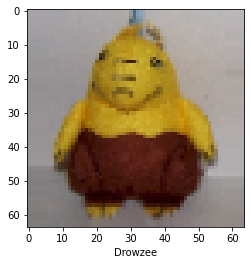

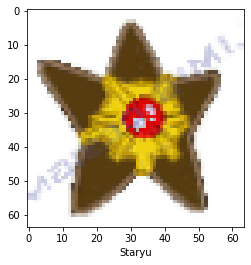

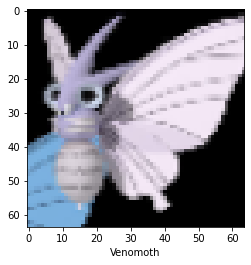

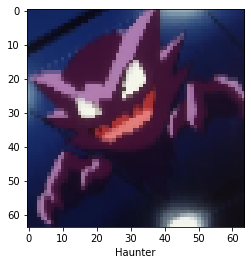

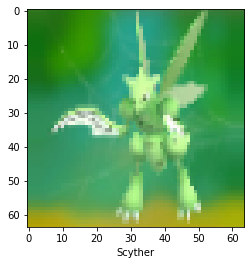

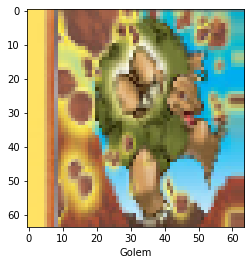

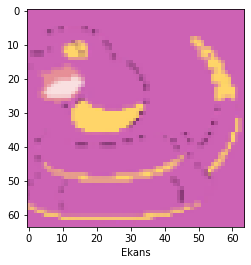

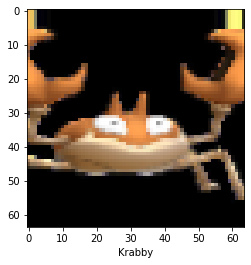

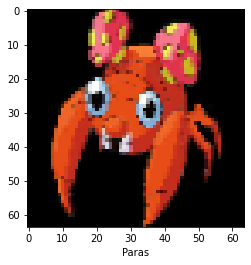

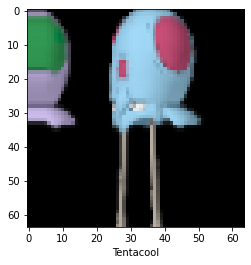

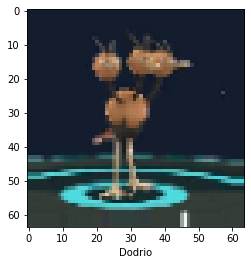

In [26]:
sample_x,sample_y = next(training_Set)
for x,y in zip( sample_x,sample_y ):
    plt.imshow(x)
    plt.xlabel(classes[y.argmax()])
    plt.show()

# training the cnn

In [27]:
model = tf.keras.models.Sequential()

In [28]:
model.add(tf.keras.layers.Conv2D(filters = 256 ,kernel_size = 3,activation= "relu",input_shape = [64,64,3]))

In [29]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides = 2))

In [30]:
model.add(tf.keras.layers.Conv2D(filters = 128 ,kernel_size = 3,activation= "relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides = 2))

In [31]:
model.add(tf.keras.layers.BatchNormalization())

In [32]:
model.add(tf.keras.layers.Conv2D(filters = 64 ,kernel_size = 3,activation= "relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides = 2))

In [33]:
model.add(tf.keras.layers.Flatten())

In [34]:
model.add(tf.keras.layers.Dropout(0.3))

In [35]:
model.add(tf.keras.layers.Dense(units = 512,activation = 'relu'))

In [36]:
model.add(tf.keras.layers.Dense(units = 256,activation = 'relu'))

In [37]:
model.add(tf.keras.layers.Dense(units = 128,activation = 'relu'))

In [38]:
model.add(tf.keras.layers.Dense(len(classes),activation = 'softmax'))

In [39]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [40]:
model.fit(training_Set,epochs = 20)

Epoch 1/20
214/214 [==============================] - 176s 804ms/step - loss: 4.4618 - accuracy: 0.0525
Epoch 2/20
214/214 [==============================] - 29s 137ms/step - loss: 3.3594 - accuracy: 0.1729
Epoch 3/20
214/214 [==============================] - 29s 137ms/step - loss: 2.7738 - accuracy: 0.2833
Epoch 4/20
214/214 [==============================] - 29s 137ms/step - loss: 2.3874 - accuracy: 0.3650
Epoch 5/20
214/214 [==============================] - 29s 137ms/step - loss: 2.0672 - accuracy: 0.4437
Epoch 6/20
214/214 [==============================] - 29s 137ms/step - loss: 1.9051 - accuracy: 0.4783
Epoch 7/20
214/214 [==============================] - 29s 137ms/step - loss: 1.6347 - accuracy: 0.5438
Epoch 8/20
214/214 [==============================] - 29s 137ms/step - loss: 1.4978 - accuracy: 0.5821
Epoch 9/20
214/214 [==============================] - 29s 137ms/step - loss: 1.3484 - accuracy: 0.6144
Epoch 10/20
214/214 [==============================] - 29s 137ms/step - 

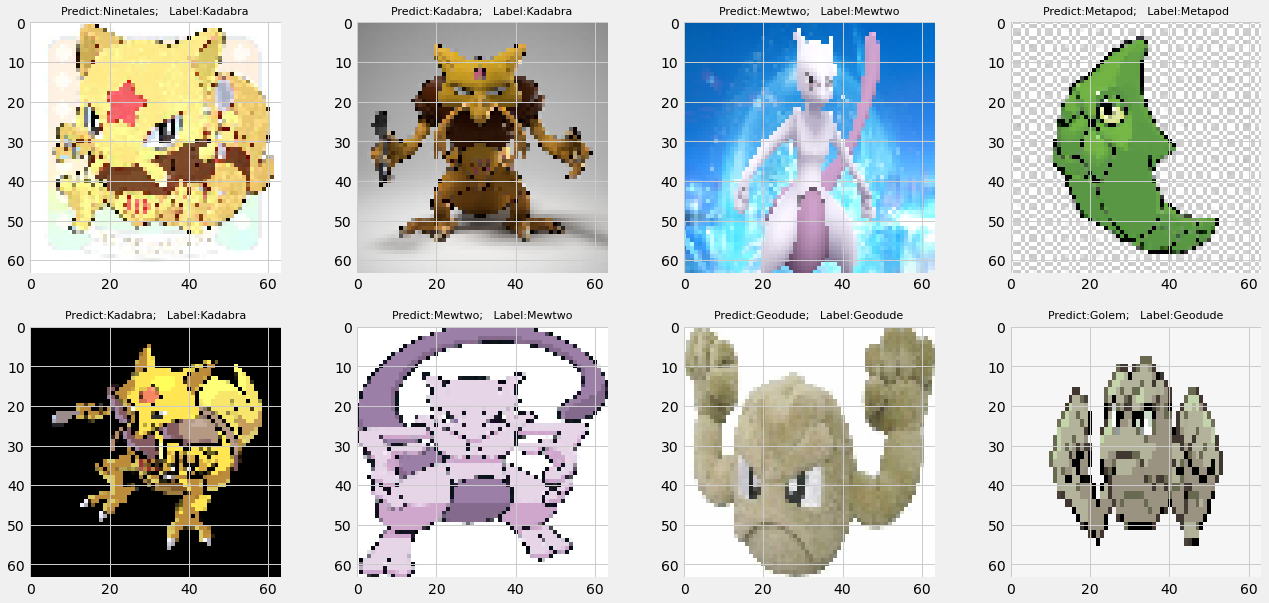

In [102]:
plt.figure(figsize=(21,19))
t_x,t_y = next(test_Set) 
pred_ = model.predict(t_x)
for i in range(len(sam_x)):
    pred,y = pred_[i].argmax(), t_y[i].argmax()
    plt.subplot(4,4,i+1)
    plt.imshow(t_x[i])
    title_ = 'Predict:' + str(classes[pred])+ ';  Label:' + str(class1[y])
    plt.title(title_,size = 13)
plt.show()

In [68]:
training_Set.class_indices

{'Abra': 0,
 'Aerodactyl': 1,
 'Alakazam': 2,
 'Alolan Sandslash': 3,
 'Arbok': 4,
 'Arcanine': 5,
 'Articuno': 6,
 'Beedrill': 7,
 'Bellsprout': 8,
 'Blastoise': 9,
 'Bulbasaur': 10,
 'Butterfree': 11,
 'Caterpie': 12,
 'Chansey': 13,
 'Charizard': 14,
 'Charmander': 15,
 'Charmeleon': 16,
 'Clefable': 17,
 'Clefairy': 18,
 'Cloyster': 19,
 'Cubone': 20,
 'Dewgong': 21,
 'Diglett': 22,
 'Ditto': 23,
 'Dodrio': 24,
 'Doduo': 25,
 'Dragonair': 26,
 'Dragonite': 27,
 'Dratini': 28,
 'Drowzee': 29,
 'Dugtrio': 30,
 'Eevee': 31,
 'Ekans': 32,
 'Electabuzz': 33,
 'Electrode': 34,
 'Exeggcute': 35,
 'Exeggutor': 36,
 'Farfetchd': 37,
 'Fearow': 38,
 'Flareon': 39,
 'Gastly': 40,
 'Gengar': 41,
 'Geodude': 42,
 'Gloom': 43,
 'Golbat': 44,
 'Goldeen': 45,
 'Golduck': 46,
 'Golem': 47,
 'Graveler': 48,
 'Grimer': 49,
 'Growlithe': 50,
 'Gyarados': 51,
 'Haunter': 52,
 'Hitmonchan': 53,
 'Hitmonlee': 54,
 'Horsea': 55,
 'Hypno': 56,
 'Ivysaur': 57,
 'Jigglypuff': 58,
 'Jolteon': 59,
 'Jynx': 60,